In [36]:
#import 
#!pip install germanetpy==0.2.2
from pathlib import Path
from germanetpy import germanet
import pandas as pd
import csv
import os
import glob
import numpy as np
import spacy
import swifter
import re
import nltk
import codecs
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.corpus import wordnet 
from nltk.stem.cistem import Cistem
from collections import Counter
from spacy.lang.de.examples import sentences 
#!pip3 install bokeh
from bokeh.plotting import ColumnDataSource
from bokeh.plotting import figure
from bokeh.plotting import show
from bokeh.plotting import output_file
from bokeh.transform import factor_cmap
#!pip install matplotlib
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
#loading de_core_news_sm-3.0.0 for preprocessing
nlp = spacy.load("/Users/anna/Desktop/NLP/sciebo-code_PowerPuff/de_core_news_sm-3.0.0/de_core_news_sm/de_core_news_sm-3.0.0")
#germanet import
#germanet_object = germanet.Germanet("/Users/anna/germanet_data/GN_V170_XML")




/usr/local/lib/python3.9/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'de_core_news_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [37]:
#How many questions do we have?
df = pd.read_csv("richtig.csv", sep=';', encoding='utf-8')

pd.set_option('display.min_rows', 50)
pd.options.display.max_colwidth = 10000
df['Frage?'].value_counts()

1    38440
0    14024
Name: Frage?, dtype: int64

(-1.1103252332175926,
 1.1144132032067378,
 -1.1183380289065064,
 1.1119083344050673)

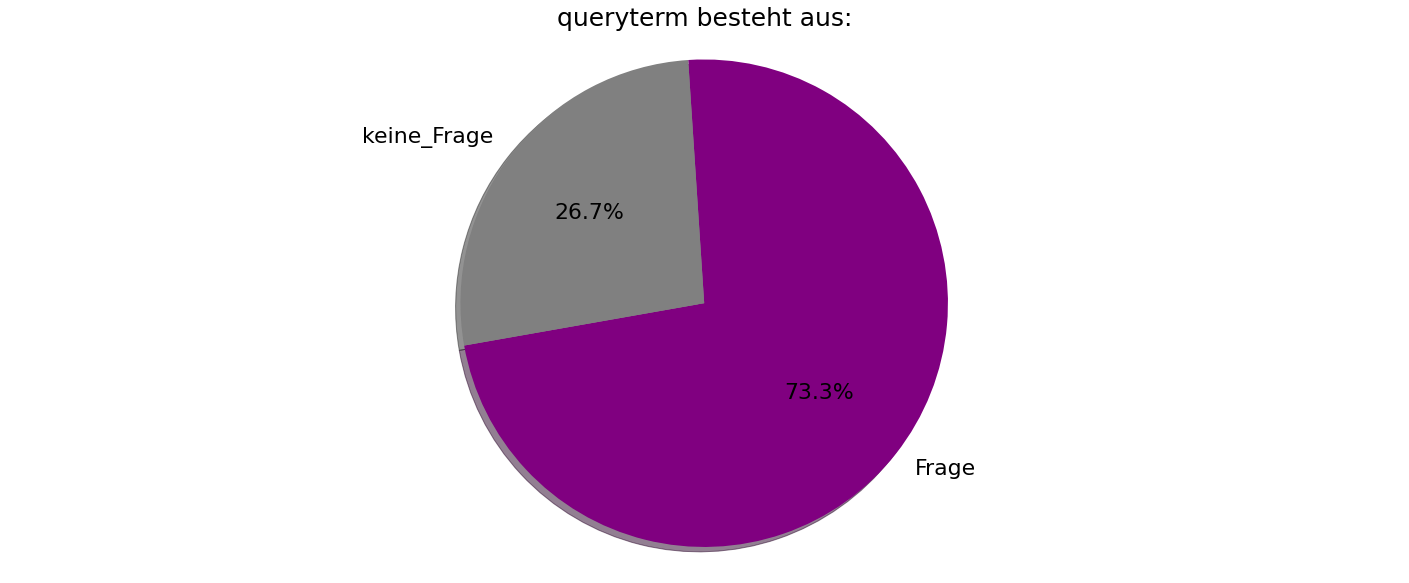

In [38]:
plt.style.use('seaborn-bright')
labels = 'Frage', 'keine_Frage'
sizes = [38440, 14024]
colors = ['purple','gray']
plt.figure(figsize=(25,10))

plt.pie(sizes,              
        labels=labels,      
        colors=colors,      
        autopct='%1.1f%%',  
        shadow=True,        
        startangle=190)     

plt.title('queryterm besteht aus:', fontsize=25)
plt.rcParams.update({'font.size': 22})

plt.axis('equal')
#plt.show()

In [39]:
#gender
df.loc[df.stemmed_words=='manner','stemmed_words'] = 'Mann'
df.loc[df.stemmed_words=='frauen','stemmed_words'] = 'Frau'
df.loc[df.stemmed_words=='mann','stemmed_words'] = 'Mann'
df.loc[df.stemmed_words=='frau','stemmed_words'] = 'Frau'
#minorities
df.loc[df.stemmed_words=='rom','stemmed_words'] = 'Roma'
df.loc[df.stemmed_words=='roma','stemmed_words'] = 'Roma'
df.loc[df.stemmed_words=='sinto','stemmed_words'] = 'Sinti'
df.loc[df.stemmed_words=='sinti','stemmed_words'] = 'Sinti'
df.loc[df.stemmed_words=='fluchtling','stemmed_words'] = 'Migrant'
df.loc[df.stemmed_words=='illegaler','stemmed_words'] = 'Migrant'
df.loc[df.stemmed_words=='illegal','stemmed_words'] = 'Migrant'
df.loc[df.stemmed_words=='migra','stemmed_words'] = 'Migrant'
df.loc[df.stemmed_words=='immigra','stemmed_words'] = 'Migrant'
df.loc[df.stemmed_words=='arab','stemmed_words'] = 'arabisch'
df.loc[df.stemmed_words=='kurd','stemmed_words'] = 'kurdisch'
df.loc[df.stemmed_words=='jugoslawe','stemmed_words'] = 'jugoslawisch'
df.loc[df.stemmed_words=='jugoslaw','stemmed_words'] = 'jugoslawisch'
#skin color
df.loc[df.stemmed_words=='schwarzer','stemmed_words'] = 'schwarz'
df.loc[df.stemmed_words=='weiss','stemmed_words'] = 'weiß'

#population group - geografisch oder national
#Europa
df.loc[df.stemmed_words=='europa','stemmed_words'] = 'europäisch'
#Westeuropa
df.loc[df.stemmed_words=='franzo','stemmed_words'] = 'französisch'
df.loc[df.stemmed_words=='franzosisch','stemmed_words'] = 'französisch'
df.loc[df.stemmed_words=='engla','stemmed_words'] = 'englisch'
df.loc[df.stemmed_words=='niederla','stemmed_words'] = 'niederländisch'
df.loc[df.stemmed_words=='niederlandisch','stemmed_words'] = 'niederländisch'
df.loc[df.stemmed_words=='holla','stemmed_words'] = 'holländisch'
df.loc[df.stemmed_words=='hollandisch','stemmed_words'] = 'holländisch'
#Mitteleuropa (Central Europa)
df.loc[df.stemmed_words=='deutscher','stemmed_words'] = 'deutsch'
df.loc[df.stemmed_words=='pol','stemmed_words'] = 'polnisch'
df.loc[df.stemmed_words=='osterreich','stemmed_words'] = 'österreichisch'
df.loc[df.stemmed_words=='osterreichisch','stemmed_words'] = 'österreichisch'
df.loc[df.stemmed_words=='schweiz','stemmed_words'] = 'schweizerisch'
#Osteuropa
df.loc[df.stemmed_words=='russ','stemmed_words'] = 'russisch'
df.loc[df.stemmed_words=='ukrai','stemmed_words'] = 'ukrainisch'
#Südeuropa
df.loc[df.stemmed_words=='italie','stemmed_words'] = 'italienisch'
df.loc[df.stemmed_words=='portugie','stemmed_words'] = 'portugiesisch'
df.loc[df.stemmed_words=='spanier','stemmed_words'] = 'spanisch'
#Südosteuropa
df.loc[df.stemmed_words=='griech','stemmed_words'] = 'griechisch'
df.loc[df.stemmed_words=='kroa','stemmed_words'] = 'kroatisch'
df.loc[df.stemmed_words=='rumanisch','stemmed_words'] = 'rumänisch'
df.loc[df.stemmed_words=='ruma','stemmed_words'] = 'rumänisch'
df.loc[df.stemmed_words=='serb','stemmed_words'] = 'serbisch'
df.loc[df.stemmed_words=='bosnier','stemmed_words'] = 'bosnisch'
df.loc[df.stemmed_words=='bulgar','stemmed_words'] = 'bulgarisch'
#df.loc[df.stemmed_words=='türke','stemmed_words'] = 'türkisch'

#Afrika
df.loc[df.stemmed_words=='afrika','stemmed_words'] = 'afrikanisch'

#Amerika
df.loc[df.stemmed_words=='amerika','stemmed_words'] = 'amerikanisch'

#Asien
df.loc[df.stemmed_words=='asia','stemmed_words'] = 'asiatisch'
#Voderasien
df.loc[df.stemmed_words=='ira','stemmed_words'] = 'iranisch'
df.loc[df.stemmed_words=='irak','stemmed_words'] = 'irakisch'
df.loc[df.stemmed_words=='syrer','stemmed_words'] = 'syrisch'
df.loc[df.stemmed_words=='turk','stemmed_words'] = 'türkisch'
df.loc[df.stemmed_words=='turkisch','stemmed_words'] = 'türkisch'
#Zentralasien
df.loc[df.stemmed_words=='afgha','stemmed_words'] = 'afghanisch'
#Ostasien
df.loc[df.stemmed_words=='chi','stemmed_words'] = 'chinesisch'
#Südasien
df.loc[df.stemmed_words=='inder','stemmed_words'] = 'indisch'
df.loc[df.stemmed_words=='pakista','stemmed_words'] = 'pakistanisch'
#Südostasien
df.loc[df.stemmed_words=='vietnam','stemmed_words'] = 'vietnamesisch'

df.loc[df.stemmed_words=='israeli','stemmed_words'] = 'israelisch'
#religious community
df.loc[df.stemmed_words=='agnostik','stemmed_words'] = 'Agnostizismus'
df.loc[df.stemmed_words=='agnostizismu','stemmed_words'] = 'Agnostizismus'
df.loc[df.stemmed_words=='agnostisch','stemmed_words'] = 'Agnostizismus'
df.loc[df.stemmed_words=='atheismu','stemmed_words'] = 'Atheismus'
df.loc[df.stemmed_words=='atheistisch','stemmed_words'] = 'Atheismus'
df.loc[df.stemmed_words=='atheti','stemmed_words'] = 'Atheismus'
df.loc[df.stemmed_words=='athei','stemmed_words'] = 'Atheismus'
df.loc[df.stemmed_words=='christentum','stemmed_words'] = 'Christentum'
df.loc[df.stemmed_words=='chri','stemmed_words'] = 'Christentum'
df.loc[df.stemmed_words=='christlich','stemmed_words'] = 'Christentum'
df.loc[df.stemmed_words=='evangelisch','stemmed_words'] = 'Evangelikalismus'
df.loc[df.stemmed_words=='jud','stemmed_words'] = 'Judentum'
df.loc[df.stemmed_words=='judisch','stemmed_words'] = 'Judentum'
df.loc[df.stemmed_words=='judentum','stemmed_words'] = 'Judentum'
df.loc[df.stemmed_words=='katholik','stemmed_words'] = 'Katholizismus'
df.loc[df.stemmed_words=='katholisch','stemmed_words'] = 'Katholizismus'
df.loc[df.stemmed_words=='jehova','stemmed_words'] = 'Jehova'
df.loc[df.stemmed_words=='protesta', 'stemmed_words'] = 'Protestantismus'
df.loc[df.stemmed_words=='protestantisch', 'stemmed_words'] = 'Protestantismus'
df.loc[df.stemmed_words=='pro', 'stemmed_words'] = 'Protestantismus'
df.loc[df.stemmed_words=='muslim','stemmed_words'] = 'Islam'
df.loc[df.stemmed_words=='muslimisch','stemmed_words'] = 'Islam'
df.loc[df.stemmed_words=='islam','stemmed_words'] = 'Islam'

df.loc[df.stemmed_words=='moch','stemmed_words'] = 'Störfaktoren'


In [72]:
pd.set_option('display.min_rows', 50)
pd.options.display.max_colwidth = 10000
Grafik2 = df['stemmed_words'].value_counts()
Grafik2 = Grafik2.drop(labels=['Störfaktoren'])

,suggestion_id,label,queryterm,date,client,lang,geolocation,url,proxy_ip,proxy_city,...,synsets_ger,lexunits,hypernyms,lexunits_hypernyms,hyponyms,lexunits_hyponyms,tokens_suggestions_tensor,lexunits_tensor,tokens_suggestions_tensor_sum,lexunits_tensor_sum
0,4538056,google_psy,türke,2020-05-03 08:05:01.0,psy-ab,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,[],[],[],[],[],[],"tensor([-0.8585, 0.9375, -0.0100, -0.8762, 0.8159, 0.7524, -0.7850, 0.7641,\n 0.9200, 0.9476, -0.9428])",NaN,tensor(1.6650),NaN
1,4538057,google_firefox,türke,2020-05-03 08:05:01.0,firefox,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,[],[],[],[],[],[],"tensor([-0.8585, -0.0100, -0.8762, 0.8159, 0.7524, -0.7850, 0.7808, 0.7641,\n 0.9476, -0.9428])",NaN,tensor(0.5884),NaN
2,4538058,ddg,türke,2020-05-03 08:05:01.0,NaN,NaN,NaN,https://duckduckgo.com/ac/,localhost,Köln,...,[],[],[],[],[],[],"tensor([-0.8837, -0.6965, 0.6344, -0.9146, 0.8075, 0.8262, 0.8036, -0.9619,\n -0.9897])",NaN,tensor(-1.3746),NaN
3,4538059,bing,türke,2020-05-03 08:05:01.0,NaN,NaN,NaN,http://api.bing.net/osjson.aspx,localhost,Köln,...,"[[Synset(id=s55185, lexunits=zurücktreten), Synset(id=s53428, lexunits=zurücktreten), Synset(id=s105220, lexunits=zurücktreten), Synset(id=s106271, lexunits=zurücktreten), Synset(id=s106269, lexunits=zurücktreten)], [Synset(id=s3285, lexunits=kostenlos, kostenfrei, unentgeltlich, frei)]]","['zurücktreten', 'zurücktreten', 'zurücktreten', 'zurücktreten', 'zurücktreten', 'kostenlos', 'kostenfrei', 'unentgeltlich', 'frei']","[{Synset(id=s55172, lexunits=aufgeben, verzichten, versagen)}, {Synset(id=s53419, lexunits=ausscheiden)}, {Synset(id=s57575, lexunits=treten)}, {Synset(id=s59787, lexunits=abnehmen)}, {Synset(id=s56769, lexunits=verlaufen)}, {Synset(id=s2147, lexunits=kostenspezifisch)}]","['aufgeben', 'verzichten', 'versagen', 'ausscheiden', 'treten', 'abnehmen', 'verlaufen', 'kostenspezifisch']","[set(), {Synset(id=s80699, lexunits=demissionieren)}, set(), set(), set(), {Synset(id=s3459, lexunits=beitragsfrei), Synset(id=s3422, lexunits=gebührenfrei, gebührenlos), Synset(id=s3436, lexunits=mietfrei), Synset(id=s108895, lexunits=aufkommensneutral)}]","['demissionieren', 'beitragsfrei', 'gebührenfrei', 'gebührenlos', 'mietfrei', 'aufkommensneutral']","tensor([-0.8585, 0.9375, 0.4337, -0.9406, -0.1998, -0.8762, 0.8159, 0.7524,\n 0.7612, -0.9944, 0.9223, 0.6343, 0.9476, -0.0052, 0.7790])","tensor([-0.9261, -0.9261, -0.9261, -0.9261, -0.9261, 0.9104, 0.9171, -0.4649,\n 0.8644])",tensor(3.1092),tensor(-2.4034)
4,4538060,google_psy,pole,2020-05-03 08:05:02.0,psy-ab,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,"[[Synset(id=s66916, lexunits=polen)], [Synset(id=s1646, lexunits=polemisch)]]","['polen', 'polemisch']","[{Synset(id=s56823, lexunits=anschließen)}, {Synset(id=s1643, lexunits=stilistisch), Synset(id=s4988, lexunits=provozierend, provokativ)}]","['anschließen', 'stilistisch', 'provozierend', 'provokativ']","[{Synset(id=s80471, lexunits=umpolen)}, set()]",['umpolen'],"tensor([-0.7592, -0.8762, 0.8159, -0.8624, -0.0494, 0.8508, 0.9200, -0.8231,\n -0.9759, -0.9456, 0.8003, -0.9032])","tensor([-0.8216, -0.8856])",tensor(-2.8080),tensor(-1.7072)
5,4538061,google_firefox,pole,2020-05-03 08:05:02.0,firefox,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,"[[Synset(id=s66916, lexunits=polen)], [Synset(id=s1646, lexunits=polemisch)]]","['polen', 'polemisch']","[{Synset(id=s56823, lexunits=anschließen)}, {Synset(id=s1643, lexunits=stilistisch), Synset(id=s4988, lexunits=provozierend, provokativ)}]","['anschließen', 'stilistisch', 'provozierend', 'provokativ']","[{Synset(id=s80471, lexunits=umpolen)}, set()]",['umpolen'],"tensor([-0.7592, -0.8762, 0.8159, -0.8624, -0.0494, 0.8508, -0.8231, -0.9759,\n -0.9456, 0.8003, -0.9032])","tensor([-0.8216, -0.8856])",tensor(-3.7279),tensor(-1.7072)
6,4538062,bing,pole,2020-05-03 08:05:03.0,NaN,NaN,NaN,http://api.bing.net/osjson.aspx,localhost,Köl

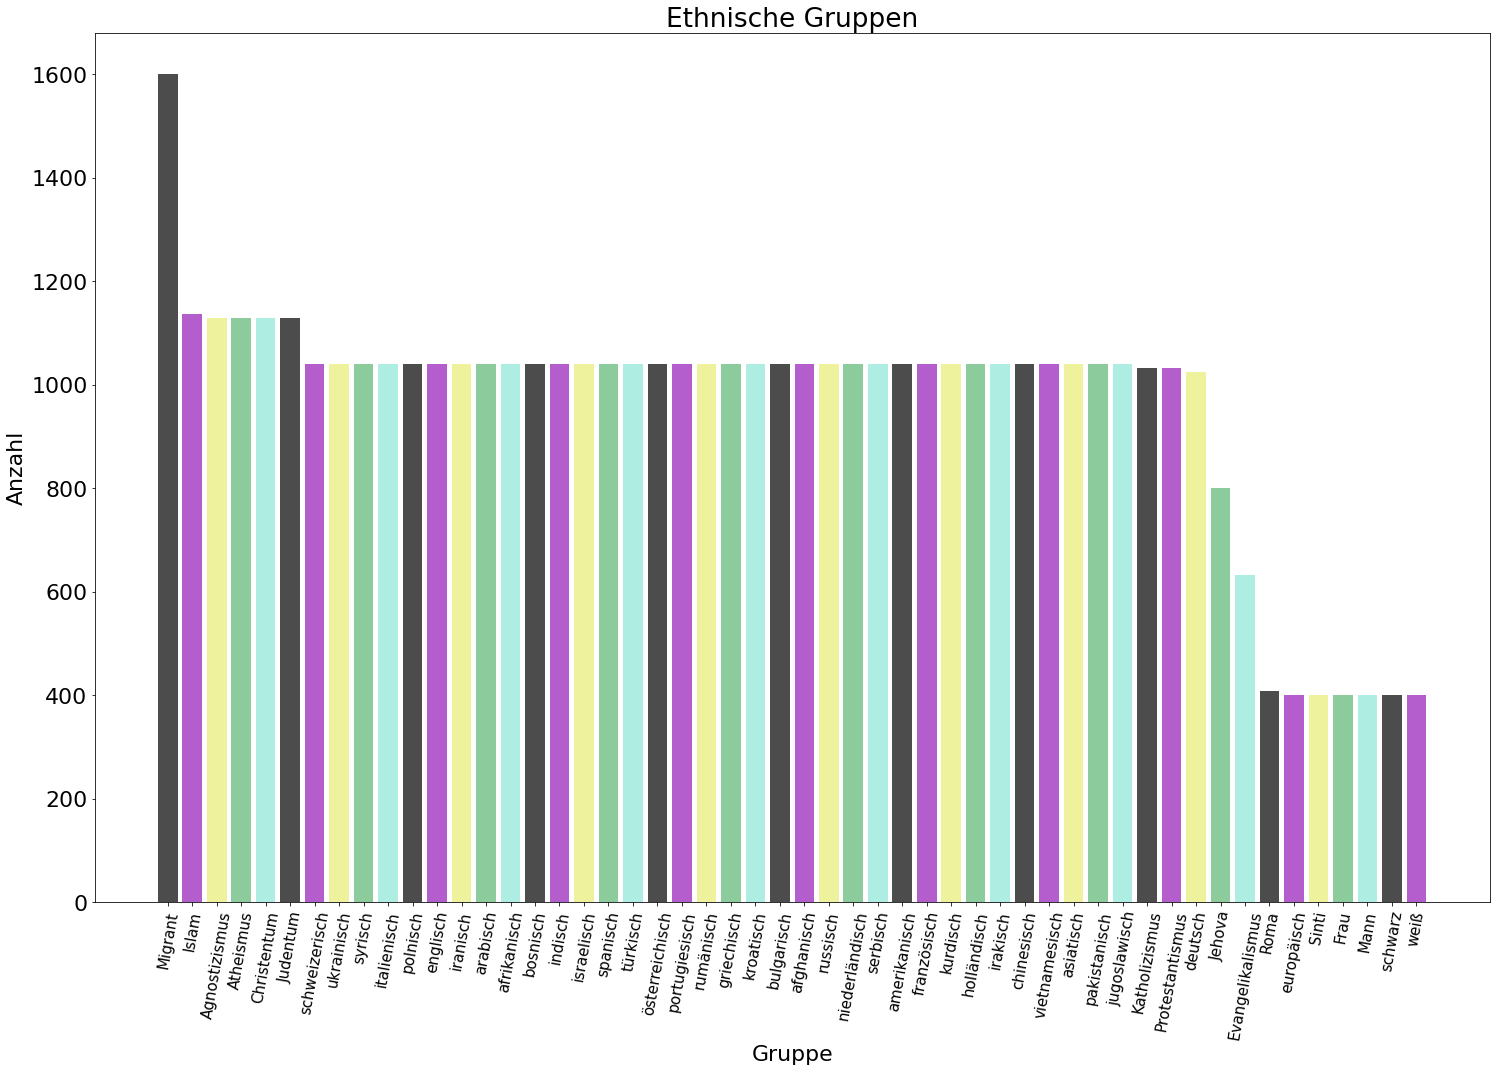

<Figure size 432x288 with 0 Axes>

In [70]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(25,16))
#plt.figure(figsize=(25,10))
candidates = Grafik2.index.tolist()
voter = Grafik2.to_numpy()
ax.plot(range(len(voter)),range(len(candidates)))

y_pos = np.arange(len(Grafik2))
couleur = ['#000000', '#951ab8', '#e9ed72', '#5cb571', '#8ce6d7']
#plt.figure(figsize=(25,10))
plt.title('Ethnische Gruppen')
plt.ylabel('Anzahl')
plt.xlabel("Gruppe")
ax.tick_params(axis='x', labelsize=36)
plt.bar(y_pos, voter, align='center', alpha=0.7, color=couleur)
ax.lines.remove(ax.lines[0])
#alpha = 3,6
#plt.xlabel("X-Axis")
#plt.xticks(x, candidates)
ax.set_xticks(range(len(candidates)))
ax.set_xticklabels(candidates, rotation=80, fontsize=15)


plt.show()

In [112]:
def get_bias_for_group(group):
    lowCounter = 0
    middleCounter = 0
    highCounter = 0
    for row in df.itertuples(index=True, name='Pandas'):
        if group in row.stemmed_words:
            tensors = row.tokens_suggestions_tensor
            tensors = str(tensors).replace("tensor",'')
            tensors = str(tensors).replace("\[",'')
            tensors = str(row.tokens_suggestions_tensor).split(',')
            for tensor in tensors:
                if tensor != '' or tensor is not None:
                    tensor = tensor.strip()
                    tensor = tensor.replace("[",'')
                    tensor = tensor.replace("]",'')
                    tensor = tensor.replace("'",'')
                    tensor = tensor.replace("tensor",'')
                    tensor = tensor.replace("(",'')
                    tensor = tensor.replace(")",'')
                    tensor = float(tensor)
                    if tensor <= -0.5:
                        lowCounter = lowCounter + 1
                    elif tensor > -0.5 and tensor < 0:
                        middleCounter = middleCounter + 1
                    elif tensor > 0:
                        highCounter = highCounter + 1
    return [lowCounter, middleCounter, highCounter]
biasAtheismus = get_bias_for_group('Atheismus')
biasChristentum = get_bias_for_group('Christentum')
biasIslam = get_bias_for_group('Islam')
biasJudentum = get_bias_for_group('Judentum')

[2354, 745, 2868]

In [113]:
biasAtheismus

[1374, 770, 1593]

In [31]:
unique_queryterm2=np.unique(df['stemmed_words'])
for i in unique_queryterm2:
    print(i)

Agnostizismus
Atheismus
Christentum
Evangelikalismus
Frau
Islam
Jehova
Judentum
Katholizismus
Mann
Migrant
Protestantismus
Roma
Sinti
afghanisch
afrikanisch
amerikanisch
arabisch
asiatisch
bosnisch
bulgarisch
chinesisch
deutsch
englisch
europäisch
französisch
griechisch
holländisch
indisch
irakisch
iranisch
israelisch
italienisch
jugoslawisch
kroatisch
kurdisch
moch
niederländisch
pakistanisch
polnisch
portugiesisch
rumänisch
russisch
schwarz
schweizerisch
serbisch
spanisch
syrisch
türkisch
ukrainisch
vietnamesisch
weiß
österreichisch


In [268]:
pd.set_option('display.min_rows', 50)
pd.options.display.max_colwidth = 10000
lexhyp = df['lexunits_hypernyms'].value_counts()
lexhyp

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [269]:
# here the tensors have to be reprocessed, 
# because in a previous step it was written to the DataFrame as a string and not as a PyTorch object.
import re

def cleanup_stringlists(customList):
    cleanedWordlist = []
    customList = customList.split(",")
    for string in customList:
        string = string.strip()
        string = string.replace("[",'')
        string = string.replace("]",'')
        string = string.replace("'",'')
        if string != '':
            cleanedWordlist.append(string)
    return cleanedWordlist


In [ ]:
#!pip install wordcloud
#before Stopwords and lemma
text_suggestions_before = str(df['raw_data'])

x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white",width=1920, height=2080, mask=mask).generate(text_suggestions_before)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



Pandas Apply:   0%|          | 0/52464 [00:00<?, ?it/s]

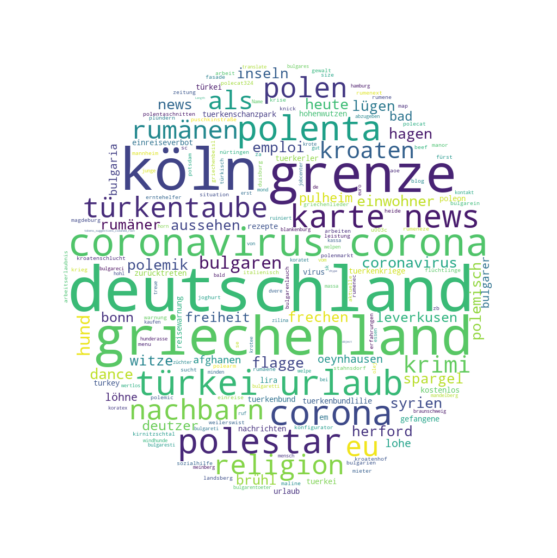

In [273]:
#after cleaning
text_suggestions_before = df.tokens_suggestions_cleaned_root.swifter.apply(lambda row: cleanup_stringlists(row))

from wordcloud import WordCloud
import matplotlib.pyplot as plt
x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white",width=1920, height=2080, mask=mask).generate(str(text_suggestions_before))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Pandas Apply:   0%|          | 0/52464 [00:00<?, ?it/s]

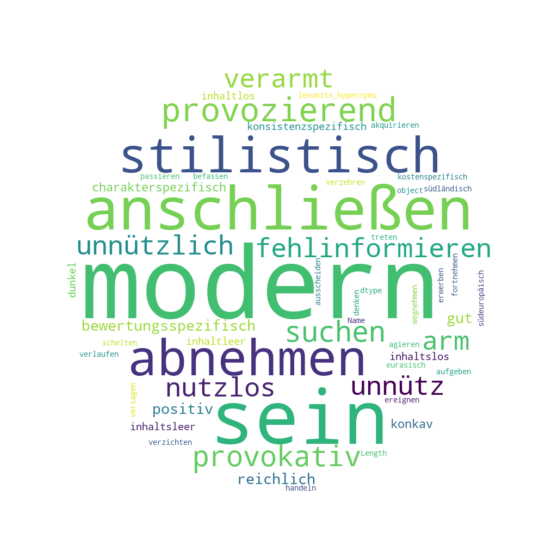

In [279]:
#lexunits_hypernyms
text_suggestions_after = df.lexunits_hypernyms.swifter.apply(lambda row: cleanup_stringlists(row))
x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white",width=1920, height=2080, mask=mask).generate(str(text_suggestions_after))
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
tokens_suggestions_tensor

In [61]:
df

,suggestion_id,label,queryterm,date,client,lang,geolocation,url,proxy_ip,proxy_city,...,synsets_ger,lexunits,hypernyms,lexunits_hypernyms,hyponyms,lexunits_hyponyms,lexunits_tensor,lexunits_tensor_sum,chinesisch,tokens_suggestions_tensor
0,4538056,google_psy,türkisch,2020-05-03 08:05:01.0,psy-ab,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,[],[],[],[],[],[],NaN,NaN,NaN,"tensor([ 0.7524, -0.7850, 0.7641, -0.8585, 0.8159, 0.9200, -0.8762, 0.9375,\n -0.0100, 0.9476, -0.9428])"
1,4538057,google_firefox,türkisch,2020-05-03 08:05:01.0,firefox,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,[],[],[],[],[],[],NaN,NaN,NaN,"tensor([ 0.7524, -0.7850, 0.7641, -0.8585, 0.8159, -0.8762, -0.0100, 0.9476,\n -0.9428, 0.7808])"
2,4538058,ddg,türkisch,2020-05-03 08:05:01.0,NaN,NaN,NaN,https://duckduckgo.com/ac/,localhost,Köln,...,[],[],[],[],[],[],NaN,NaN,NaN,"tensor([-0.9897, 0.6344, -0.9146, 0.8036, 0.8262, 0.8075, -0.9619, -0.8837,\n -0.6965])"
3,4538059,bing,türkisch,2020-05-03 08:05:01.0,NaN,NaN,NaN,http://api.bing.net/osjson.aspx,localhost,Köln,...,"[[Synset(id=s105220, lexunits=zurücktreten), Synset(id=s53428, lexunits=zurücktreten), Synset(id=s106271, lexunits=zurücktreten), Synset(id=s55185, lexunits=zurücktreten), Synset(id=s106269, lexunits=zurücktreten)], [Synset(id=s3285, lexunits=kostenlos, kostenfrei, unentgeltlich, frei)]]","['zurücktreten', 'zurücktreten', 'zurücktreten', 'zurücktreten', 'zurücktreten', 'kostenlos', 'kostenfrei', 'unentgeltlich', 'frei']","[{Synset(id=s57575, lexunits=treten)}, {Synset(id=s53419, lexunits=ausscheiden)}, {Synset(id=s59787, lexunits=abnehmen)}, {Synset(id=s55172, lexunits=aufgeben, verzichten, versagen)}, {Synset(id=s56769, lexunits=verlaufen)}, {Synset(id=s2147, lexunits=kostenspezifisch)}]","['treten', 'ausscheiden', 'abnehmen', 'aufgeben', 'verzichten', 'versagen', 'verlaufen', 'kostenspezifisch']","[set(), {Synset(id=s80699, lexunits=demissionieren)}, set(), set(), set(), {Synset(id=s108895, lexunits=aufkommensneutral), Synset(id=s3459, lexunits=beitragsfrei), Synset(id=s3422, lexunits=gebührenfrei, gebührenlos), Synset(id=s3436, lexunits=mietfrei)}]","['demissionieren', 'aufkommensneutral', 'beitragsfrei', 'gebührenfrei', 'gebührenlos', 'mietfrei']","tensor([-0.9261, 0.9104, 0.9171, -0.4649, 0.8644])",tensor(1.3009),NaN,"tensor([ 0.7524, 0.7790, 0.7612, -0.9406, 0.6343, -0.0052, 0.4337, -0.9944,\n -0.8585, -0.1998, -0.8762, 0.8159, 0.9375, 0.9223, 0.9476])"
4,4538060,google_psy,polnisch,2020-05-03 08:05:02.0,psy-ab,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,"[[Synset(id=s1646, lexunits=polemisch)], [Synset(id=s66916, lexunits=polen)]]","['polemisch', 'polen']","[{Synset(id=s4988, lexunits=provozierend, provokativ), Synset(id=s1643, lexunits=stilistisch)}, {Synset(id=s56823, lexunits=anschließen)}]","['provozierend', 'provokativ', 'stilistisch', 'anschließen']","[set(), {Synset(id=s80471, lexunits=umpolen)}]",['umpolen'],"tensor([-0.8856, -0.8216])",tensor(-1.7072),NaN,"tensor([-0.9032, -0.7592, -0.8231, -0.9456, 0.8508, 0.8003, 0.8159, -0.8762,\n 0.9200, -0.8624, -0.9759, -0.0494])"
5,4538061,google_firefox,polnisch,2020-05-03 08:05:02.0,firefox,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,"[[Synset(id=s1646, lexunits=polemisch)], [Synset(id=s66916, lexunits=polen)]]","['polemisch', 'polen']","[{Synset(id=s4988, lexunits=provozierend, provokativ), Synset(id=s1643, lexunits=stilistisch)}, {Synset(id=s56823, lexunits=anschließen)}]","['provozierend', 'provokativ', 'stilistisch', 'anschließen']","[set(), {Synset(id=s80471, lexunits=umpolen)}]",['umpolen'],"tensor([-0.8856, -0.8216])",tensor(-1.7072),NaN,"tensor([-0.9032, -0.7592, -0.8231, -0.9456, 0.8508, 0.8003, 0.8159, -0.8762,\n -0.8624, -0.9759, -0.0494])"
6,4538062,bing,polnisch,2020-05-03 08:05:03.0,NaN,NaN,NaN,http://api.bing.net/osjson.aspx,localhost,Köln,...,"[[Synset(id=s66916, lexunits=polen)], [Synset(id=s1312, lexunits=italienisch)]]","['polen', '

In [ ]:
pd.set_option('display.min_rows', 50)
pd.options.display.max_colwidth = 10000
df['lexunits'].value_counts()

In [ ]:
pd.set_option('display.min_rows', 50)
pd.options.display.max_colwidth = 10000
df['tokens_suggestions_cleaned_root'].value_counts()

In [ ]:
df.groupby('stemmed_words').count()

In [ ]:
nlp = spacy.load("/Users/anna/Desktop/NLP/sciebo-code_PowerPuff/de_core_news_sm-3.0.0/de_core_news_sm/de_core_news_sm-3.0.0")
token_suggestions_forms = nlp(str(df['tokens_suggestions_cleaned_root']))

for token in token_suggestions_forms:
    print(token.text," -- ", token.pos_,) 

displacy.render(token_suggestions_forms, style='ent', jupyter=True)
print(*token_suggestions_forms, sep="\n")

In [ ]:
for ent in token_suggestions_forms.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [80]:
df['lexunits_tensor_sum']

0                    NaN
1                    NaN
2                    NaN
3         tensor(1.3009)
4        tensor(-1.7072)
5        tensor(-1.7072)
6        tensor(-0.1856)
7                    NaN
8        tensor(-1.8486)
9         tensor(0.9846)
10       tensor(-1.8486)
11                   NaN
12                   NaN
13                   NaN
14       tensor(-1.1680)
15                   NaN
16                   NaN
17                   NaN
18        tensor(2.4875)
19        tensor(1.5943)
20                   NaN
21                   NaN
22        tensor(2.2359)
23       tensor(-0.9573)
24                   NaN
              ...       
52439                NaN
52440                NaN
52441                NaN
52442                NaN
52443                NaN
52444                NaN
52445                NaN
52446                NaN
52447                NaN
52448                NaN
52449                NaN
52450                NaN
52451                NaN
52452                NaN


In [130]:
df.head(50)

,suggestion_id,label,queryterm,date,client,lang,geolocation,url,proxy_ip,proxy_city,...,synsets_ger,lexunits,hypernyms,lexunits_hypernyms,hyponyms,lexunits_hyponyms,lexunits_tensor,lexunits_tensor_sum,chinesisch,tokens_suggestions_tensor
0,4538056,google_psy,türkisch,2020-05-03 08:05:01.0,psy-ab,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,[],[],[],[],[],[],NaN,NaN,NaN,"tensor([ 0.7524, -0.7850, 0.7641, -0.8585, 0.8159, 0.9200, -0.8762, 0.9375,\n -0.0100, 0.9476, -0.9428])"
1,4538057,google_firefox,türkisch,2020-05-03 08:05:01.0,firefox,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,[],[],[],[],[],[],NaN,NaN,NaN,"tensor([ 0.7524, -0.7850, 0.7641, -0.8585, 0.8159, -0.8762, -0.0100, 0.9476,\n -0.9428, 0.7808])"
2,4538058,ddg,türkisch,2020-05-03 08:05:01.0,NaN,NaN,NaN,https://duckduckgo.com/ac/,localhost,Köln,...,[],[],[],[],[],[],NaN,NaN,NaN,"tensor([-0.9897, 0.6344, -0.9146, 0.8036, 0.8262, 0.8075, -0.9619, -0.8837,\n -0.6965])"
3,4538059,bing,türkisch,2020-05-03 08:05:01.0,NaN,NaN,NaN,http://api.bing.net/osjson.aspx,localhost,Köln,...,"[[Synset(id=s105220, lexunits=zurücktreten), Synset(id=s53428, lexunits=zurücktreten), Synset(id=s106271, lexunits=zurücktreten), Synset(id=s55185, lexunits=zurücktreten), Synset(id=s106269, lexunits=zurücktreten)], [Synset(id=s3285, lexunits=kostenlos, kostenfrei, unentgeltlich, frei)]]","['zurücktreten', 'zurücktreten', 'zurücktreten', 'zurücktreten', 'zurücktreten', 'kostenlos', 'kostenfrei', 'unentgeltlich', 'frei']","[{Synset(id=s57575, lexunits=treten)}, {Synset(id=s53419, lexunits=ausscheiden)}, {Synset(id=s59787, lexunits=abnehmen)}, {Synset(id=s55172, lexunits=aufgeben, verzichten, versagen)}, {Synset(id=s56769, lexunits=verlaufen)}, {Synset(id=s2147, lexunits=kostenspezifisch)}]","['treten', 'ausscheiden', 'abnehmen', 'aufgeben', 'verzichten', 'versagen', 'verlaufen', 'kostenspezifisch']","[set(), {Synset(id=s80699, lexunits=demissionieren)}, set(), set(), set(), {Synset(id=s108895, lexunits=aufkommensneutral), Synset(id=s3459, lexunits=beitragsfrei), Synset(id=s3422, lexunits=gebührenfrei, gebührenlos), Synset(id=s3436, lexunits=mietfrei)}]","['demissionieren', 'aufkommensneutral', 'beitragsfrei', 'gebührenfrei', 'gebührenlos', 'mietfrei']","tensor([-0.9261, 0.9104, 0.9171, -0.4649, 0.8644])",tensor(1.3009),NaN,"tensor([ 0.7524, 0.7790, 0.7612, -0.9406, 0.6343, -0.0052, 0.4337, -0.9944,\n -0.8585, -0.1998, -0.8762, 0.8159, 0.9375, 0.9223, 0.9476])"
4,4538060,google_psy,polnisch,2020-05-03 08:05:02.0,psy-ab,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,"[[Synset(id=s1646, lexunits=polemisch)], [Synset(id=s66916, lexunits=polen)]]","['polemisch', 'polen']","[{Synset(id=s4988, lexunits=provozierend, provokativ), Synset(id=s1643, lexunits=stilistisch)}, {Synset(id=s56823, lexunits=anschließen)}]","['provozierend', 'provokativ', 'stilistisch', 'anschließen']","[set(), {Synset(id=s80471, lexunits=umpolen)}]",['umpolen'],"tensor([-0.8856, -0.8216])",tensor(-1.7072),NaN,"tensor([-0.9032, -0.7592, -0.8231, -0.9456, 0.8508, 0.8003, 0.8159, -0.8762,\n 0.9200, -0.8624, -0.9759, -0.0494])"
5,4538061,google_firefox,polnisch,2020-05-03 08:05:02.0,firefox,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,"[[Synset(id=s1646, lexunits=polemisch)], [Synset(id=s66916, lexunits=polen)]]","['polemisch', 'polen']","[{Synset(id=s4988, lexunits=provozierend, provokativ), Synset(id=s1643, lexunits=stilistisch)}, {Synset(id=s56823, lexunits=anschließen)}]","['provozierend', 'provokativ', 'stilistisch', 'anschließen']","[set(), {Synset(id=s80471, lexunits=umpolen)}]",['umpolen'],"tensor([-0.8856, -0.8216])",tensor(-1.7072),NaN,"tensor([-0.9032, -0.7592, -0.8231, -0.9456, 0.8508, 0.8003, 0.8159, -0.8762,\n -0.8624, -0.9759, -0.0494])"
6,4538062,bing,polnisch,2020-05-03 08:05:03.0,NaN,NaN,NaN,http://api.bing.net/osjson.aspx,localhost,Köln,...,"[[Synset(id=s66916, lexunits=polen)], [Synset(id=s1312, lexunits=italienisch)]]","['polen', '

In [203]:
# here the tensors have to be reprocessed, 
# because in a previous step it was written to the DataFrame as a string and not as a PyTorch object.
import re
def get_tensors_as_numbers(tensors):
    tensorNumbers = []
    tensors = str(tensors).replace("tensor",'')
    tensors = str(tensors).replace("\[",'')
    tensors = tensors.split(",")
    for tensor in tensors:
        tensor = tensor.strip()
        tensor = tensor.replace("([",'')
        tensor = tensor.replace("])",'')
        tensorNumbers.append(tensor)
    return tensorNumbers
clean_tensor_list = df.tokens_suggestions_tensor.swifter.apply(lambda row: get_tensors_as_numbers(row))
clean_tensor_list = [x for xs in clean_tensor_list for x in xs]
clean_tensor_list

Pandas Apply:   0%|          | 0/52464 [00:00<?, ?it/s]

[' 0.7524',
 '-0.7850',
 '0.7641',
 '-0.8585',
 '0.8159',
 '0.9200',
 '-0.8762',
 '0.9375',
 '-0.0100',
 '0.9476',
 '-0.9428',
 ' 0.7524',
 '-0.7850',
 '0.7641',
 '-0.8585',
 '0.8159',
 '-0.8762',
 '-0.0100',
 '0.9476',
 '-0.9428',
 '0.7808',
 '-0.9897',
 '0.6344',
 '-0.9146',
 '0.8036',
 '0.8262',
 '0.8075',
 '-0.9619',
 '-0.8837',
 '-0.6965',
 ' 0.7524',
 '0.7790',
 '0.7612',
 '-0.9406',
 '0.6343',
 '-0.0052',
 '0.4337',
 '-0.9944',
 '-0.8585',
 '-0.1998',
 '-0.8762',
 '0.8159',
 '0.9375',
 '0.9223',
 '0.9476',
 '-0.9032',
 '-0.7592',
 '-0.8231',
 '-0.9456',
 '0.8508',
 '0.8003',
 '0.8159',
 '-0.8762',
 '0.9200',
 '-0.8624',
 '-0.9759',
 '-0.0494',
 '-0.9032',
 '-0.7592',
 '-0.8231',
 '-0.9456',
 '0.8508',
 '0.8003',
 '0.8159',
 '-0.8762',
 '-0.8624',
 '-0.9759',
 '-0.0494',
 ' 5.3309e-01',
 '-8.2312e-01',
 '8.5083e-01',
 '-8.4193e-01',
 '8.8327e-01',
 '1.2526e-01',
 '1.4824e-01',
 '-8.7622e-01',
 '3.0701e-01',
 '-9.2844e-01',
 '-6.0613e-05',
 '-9.7586e-01',
 '4.1771e-02',
 '9.4042e-

clustering of following groups is possible:

label

Suchmaschine:

google_firefox
google_psy
bing
ddg
_________________
stemmd_words

Religion:

Agnostizismus
Atheismus
Christentum
Evangelikalismus
Islam
Jehova
Judentum
Katholizismus
Protestantismus
__________________
Geschlecht:

Frau
Mann
__________________
Hautfarbe:

schwarz
weiß
__________________
Minorities - kulturellen, linguistische und historische Kriterien:

Migrant
Roma
Sinti
jugoslawisch
kurdisch
arabisch
_________________
Bevölkerungsgruppen:

Europa:
europäisch

Westeuropa:
französisch
englisch
holländisch
niederländisch

Mitteleuropa:
deutsch
polnisch
österreichisch
schweizerisch

Osteuropa:
ukrainisch

Südeuropa:
portugiesisch
italienisch
spanisch

_____________
Balkan:
Südosteuropa:
griechisch
kroatisch
rumänisch
serbisch
bosnisch
bulgarisch
______________
Asien:
asiatisch

Westasien:
russisch

Ostasien:
chinesisch

Voderasien:
türkisch
iranisch
irakisch
syrisch
israelisch

Südasien:
indisch
pakistanisch

Südostasien:
vietnamesisch

Zentralasien: 
afghanisch
______________

Afrika:
afrikanisch
______________
Amerika:
amerikanisch
______________

negativ = -1.0 bis -0.5
low-negativ = -0.5 bis -0.01
no sentiment = 0 
low-positiv = 0.1 bis 0.5
positiv = 0.5 bis 1.0

